In [58]:
from IPython.core.display import display, HTML
f = open("P4_Sommaire.html", "r", encoding="utf-8")
display(HTML(f.read()))
import warnings
warnings.filterwarnings('ignore')

<div>
    <div style="display: flex; text-align:center; background-color: RGB( 254, 249, 231 );border: 1px solid RGB(51,165,182);" id="partie0">
        <h1 style="margin: auto; padding: 30px;margin-left: 2em; text-indent: -2em">
            Projet 5 -Optimisez la gestion des données d'une boutique avec R ou Python
        </h1>
    </div>
</div>    

<div>
    <div style="border-style: double;border-width: 5px;border-color: RGB(51,165,182);" >
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em">Ce programme est organisé en plusieurs partie :
        </h3>
        <br>
        <br>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 4.5em; text-indent: -4.5em">
            <lu>
                <li><a href="#partie1">Partie 1</a> : Librairies et fonctions</li><br>
                <li><a href="#partie2">Partie 2</a> : La mission : réponses aux questions</li><br>
                <li><a href="#partie3">Partie 3</a> : La réponses aux questions de Marc</li><br>
                <li><a href="#partie4">Partie 4</a> : La réponses aux questions de Mélanie</li><br>
                <li><a href="#partie5">Partie 5</a> : Visualisation des disponibilités par habitants niveau mondiale</li><br>
                <li><a href="#Conclusion">Conclusion</a></li><br>
                <li><a href="#Références">Références</a></li><br>
           </lu>
            <br>
        </div>
    </div>
</div>

<div>
    <div style="background-color: RGB(51,165,182);" id="partie1">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 1 - Librairies et fonctions
        </h2>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>
    </div>
</div>

<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie1.1" >
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em">
            1.1 - Importation les librairies
        </h3>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>
    </div>
</div>
    

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import geopandas

<br>
<div>
    <div style="background-color: RGB(51,165,182);" id="partie2">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 2 - Importer les fichiers et initialiser les Dataframe
        </h2>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>
    </div>
</div>


<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie2.1">
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">
            2- Importation et traitement des données
        </h3>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
            <lu>
                <li> 2.1 - Sous Nutrition</li>
            </lu>
        </div>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
    </div>

In [60]:
# import data sous nutrition

dfsn = pd.read_csv('/home/david/OC/cours_sujet_annexes/sous_nutrition.csv')#import du CSV
dfsn[['Année1','Année2']] = dfsn.Année.str.split('-',expand=True).astype(int)#slip de l'année en créant 2 autres colonnes
dfsn=dfsn.drop(columns="Année")#suppression de la colonne année
dfsn["Année"] = ((dfsn["Année1"]+dfsn["Année2"]) /2).astype(int)#création de la nouvelle colonne année avec l'addition des deux années splitées / 2
dfsn['Valeur']=pd.to_numeric(dfsn['Valeur'],errors='coerce').fillna(0, downcast='infer')# conversion en numeric
dfsn.drop(dfsn.iloc[:,2:4],1,inplace=True)#suppression des 2 colonnes années splitées
dfsn['Valeur']=dfsn['Valeur'].fillna(0, downcast='infer')#remplace les NaN par 0

dfsn.rename(columns={'Valeur': 'SN'}, inplace=True)#renomme colonne
dfsn['SN']=dfsn['SN']*1000000#conversion en millions
dfsn

Zone          SN  Année
0     Afghanistan   8600000.0   2013
1     Afghanistan   8800000.0   2014
2     Afghanistan   8900000.0   2015
3     Afghanistan   9700000.0   2016
4     Afghanistan  10500000.0   2017
...           ...         ...    ...
1213     Zimbabwe         0.0   2014
1214     Zimbabwe         0.0   2015
1215     Zimbabwe         0.0   2016
1216     Zimbabwe         0.0   2017
1217     Zimbabwe         0.0   2018

[1218 rows x 3 columns]

<div>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;"id="partie2.2">
            <lu>
                <li> 2.2 - Disponibilités Alimentaires</li>
            </lu>
        </div>
    <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
    </div>

In [61]:
# import data disponibilites alimentaires

df_dispo = pd.read_csv('/home/david/OC/cours_sujet_annexes/dispo_alimentaire.csv')#import du CSV
df_dispo.fillna(0, inplace=True)#remplace les NaN par 0
Convert_tokg = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']# selection des colonnes à convertir
for elt in Convert_tokg:# boucle pour convertir en kilogramme 
    df_dispo[elt] *= 1000000
df_dispo

Zone                Produit   Origine  Aliments pour animaux  \
0       Afghanistan       Abats Comestible   animale                    0.0   
1       Afghanistan        Agrumes, Autres  vegetale                    0.0   
2       Afghanistan  Aliments pour enfants  vegetale                    0.0   
3       Afghanistan                 Ananas  vegetale                    0.0   
4       Afghanistan                Bananes  vegetale                    0.0   
...             ...                    ...       ...                    ...   
15600  Îles Salomon       Viande de Suides   animale                    0.0   
15601  Îles Salomon    Viande de Volailles   animale                    0.0   
15602  Îles Salomon          Viande, Autre   animale                    0.0   
15603  Îles Salomon                    Vin  vegetale                    0.0   
15604  Îles Salomon         Épices, Autres  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                      0.0                                             5.0   
1                      0.0                                             1.0   
2                      0.0                                             1.0   
3                      0.0                                             0.0   
4                      0.0                                             4.0   
...                    ...                                             ...   
15600                  0.0                                            45.0   
15601                  0.0                                            11.0   
15602                  0.0                                             0.0   
15603                  0.0                                             0.0   
15604                  0.0                                             4.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                   1.72        
1                                                   1.29        
2                                                   0.06        
3                                                   0.00        
4                                                   2.70        
...                                                  ...        
15600                                               4.70        
15601                                               3.34        
15602                                               0.06        
15603                                               0.07        
15604                                               0.48        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                   0.20               
1                                                   0.01               
2                                                   0.01               
3                                                   0.00               
4                                                   0.02               
...                                                  ...               
15600                                               4.28               
15601                                               0.69               
15602                                               0.00               
15603                                               0.00               
15604                                               0.21               

       Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                   0.77          
1                                                   0.02          
2                                                   0.03          
3                                                   0.00          
4                                                   0.05          
...                                                  ...          
15600         

<div>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;"id="partie2.3">
            <lu>
                <li> 2.3 - Aides Alimentaires</li>
            </lu>
        </div>
    <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
    </div>

In [62]:
# import data aide alimentaires

df_aide  = pd.read_csv('/home/david/OC/cours_sujet_annexes/Aide_alimentaire.csv')#import du CSV
df_aide.rename(columns={'Valeur': 'Aide_Kg'}, inplace=True)#renomme la colonne
df_aide['Aide_Kg']=df_aide['Aide_Kg']*1000# conversion en tonnes
df_aide

Pays bénéficiaire  Année                   Produit   Aide_Kg
0          Afghanistan   2013       Autres non-céréales    682000
1          Afghanistan   2014       Autres non-céréales    335000
2          Afghanistan   2013              Blé et Farin  39224000
3          Afghanistan   2014              Blé et Farin  15160000
4          Afghanistan   2013                  Céréales  40504000
...                ...    ...                       ...       ...
1470          Zimbabwe   2015  Mélanges et préparations     96000
1471          Zimbabwe   2013              Non-céréales   5022000
1472          Zimbabwe   2014              Non-céréales   2310000
1473          Zimbabwe   2015              Non-céréales    306000
1474          Zimbabwe   2013                Riz, total     64000

[1475 rows x 4 columns]

<div>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;"id="partie2.4">
            <lu>
                <li> 2.4 - Population Mondiale</li>
            </lu>
        </div>
    <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
    </div>

In [63]:
# import data population mondiale

dfpop = pd.read_csv('/home/david/OC/cours_sujet_annexes/population.csv')#import du CSV
dfpop.rename(columns={'Valeur': 'Population'}, inplace=True)#renomme la colonne
dfpop['Population']=dfpop['Population']*1000# conversion en miilions
dfpop

Zone  Année  Population
0     Afghanistan   2013  32269589.0
1     Afghanistan   2014  33370794.0
2     Afghanistan   2015  34413603.0
3     Afghanistan   2016  35383032.0
4     Afghanistan   2017  36296113.0
...           ...    ...         ...
1411     Zimbabwe   2014  13586707.0
1412     Zimbabwe   2015  13814629.0
1413     Zimbabwe   2016  14030331.0
1414     Zimbabwe   2017  14236595.0
1415     Zimbabwe   2018  14438802.0

[1416 rows x 3 columns]

<div>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;"id="partie2.5">
            <lu>
                <li> 2.5 -  Dataframe Population Mondiale avec sous_nutrition</li>
            </lu>
        </div>
    <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
    </div>

In [64]:
# merge data sous-nutrition avec data population mondiale

dffinal = pd.merge(dfsn, dfpop, on=['Zone','Année' ],how='outer') # merge en outer permet de ne pas exclure de pays
dffinal=dffinal.fillna(0, downcast='infer')#suppression des NaN
dffinal=dffinal.assign(Ratio_SN=(dffinal['SN'])/dffinal['Population']).round(4)#création colonne Ratio SN
dffinal['SN'] = dffinal['SN'].astype(float)#conversion du types en float
dffinal

Zone          SN  Année  Population  \
0                             Afghanistan   8600000.0   2013  32269589.0   
1                             Afghanistan   8800000.0   2014  33370794.0   
2                             Afghanistan   8900000.0   2015  34413603.0   
3                             Afghanistan   9700000.0   2016  35383032.0   
4                             Afghanistan  10500000.0   2017  36296113.0   
...                                   ...         ...    ...         ...   
1411  Sint Maarten  (partie néerlandaise)         0.0   2014     38876.0   
1412  Sint Maarten  (partie néerlandaise)         0.0   2015     39968.0   
1413  Sint Maarten  (partie néerlandaise)         0.0   2016     40808.0   
1414  Sint Maarten  (partie néerlandaise)         0.0   2017     41444.0   
1415  Sint Maarten  (partie néerlandaise)         0.0   2018     41940.0   

      Ratio_SN  
0       0.2665  
1       0.2637  
2       0.2586  
3       0.2741  
4       0.2893  
...        ...  
1411    0.0000  
1412    0.0000  
1413    0.0000  
1414    0.0000  
1415    0.0000  

[1416 rows x 5 columns]

<br>
<div>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;"id="partie2.6">
            <lu>
                <li> 2.6 - Datarame spécifique pour l'année 2017</li>
            </lu>
        </div>
    <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
    </div>

In [65]:
df_2017 = dffinal[dffinal ['Année']==2017]# selection de l'année 2017
df_2017
z=df_2017['Population'].sum()
z

7548134111.0

<div>
    <div style="background-color: RGB(51,165,182);" id="partie3">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 3 - La mission : réponses aux questions de Marc
        </h2>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie3.1">
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">
            3.1 - Proportion de personnes en état de sous-nutrition
        </h3>
        <br>
        <br>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
            <lu>
                <li>La proportion de personnes en état de sous nutrition en 2017 est de 7.098%</li>
            </lu>
        </div>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

In [66]:
# méthode de calcul de la proportion
#somme des valeurs pour l'année 2017 du DF sous_nutrition / Population 2017
SN2017 =dfsn.loc[dfsn['Année'] == 2017,['SN']].sum().values[0] /dfpop.loc[dfpop['Année'] == 2017,['Population']].sum().values[0] *100

<br>
<div>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;"id="partie3.1.1">
            <lu>
                <li> 3.1.1 - Evolution de la sous nutrition  de 2013 à 2018</li>
            </lu>
            <br>
        </div>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font></div>
    </div>

In [67]:
# calcul des taux pour chaque année
SN2013 =dfsn.loc[dfsn['Année'] == 2013,['SN']].sum().values[0] /dfpop.loc[dfpop['Année'] == 2013,['Population']].sum().values[0]*100
SN2014 =dfsn.loc[dfsn['Année'] == 2014,['SN']].sum().values[0] /dfpop.loc[dfpop['Année'] == 2014,['Population']].sum().values[0]*100 
SN2015 =dfsn.loc[dfsn['Année'] == 2015,['SN']].sum().values[0] /dfpop.loc[dfpop['Année'] == 2015,['Population']].sum().values[0]*100
SN2016 =dfsn.loc[dfsn['Année'] == 2016,['SN']].sum().values[0] /dfpop.loc[dfpop['Année'] == 2016,['Population']].sum().values[0]*100
SN2017 =dfsn.loc[dfsn['Année'] == 2017,['SN']].sum().values[0] /dfpop.loc[dfpop['Année'] == 2017,['Population']].sum().values[0]*100
SN2018 =dfsn.loc[dfsn['Année'] == 2018,['SN']].sum().values[0] /dfpop.loc[dfpop['Année'] == 2018,['Population']].sum().values[0]*100

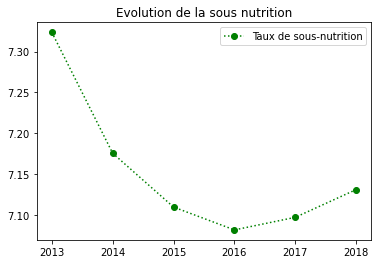

In [68]:
# Création du graphique
Taux = [SN2013,SN2014,SN2015,SN2016,SN2017,SN2018]
Année =[2013,2014,2015,2016,2017,2018]
fig=plt.figure()

plt.plot(Année,Taux, "b:o", label = "Taux de sous-nutrition",color='g')
plt.legend()
plt.title('Evolution de la sous nutrition')
plt.show()
# plt.savefig('Evolution de la sous nutrition.pdf', dpi=300, bbox_inches='tight')


<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie3.2">
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">
            3.2 - Nombre théorique de personne nourrisable (disponibilitaire alimentaire mondiale)
        </h3>
        <br>
        <br>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
            <lu>
                <li>Le nombre de personne potentiellement nourrisable est de 8 367 593 850</li>
            </lu>
        </div>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

In [69]:
# Dataframe spécifique pour le calcul
df_dispo_ali_monde=df_dispo[['Zone','Origine','Disponibilité intérieure','Aliments pour animaux','Nourriture','Pertes','Disponibilité alimentaire (Kcal/personne/jour)']]
#selection des colonnes utiles pour le calcul
df_dispo_ali_monde=df_dispo_ali_monde.groupby(['Zone']).sum()
#agregation des données par pays
df_dispo_ali_monde['Disponibilité alimentaire (Kcal/personne/an)']=df_dispo_ali_monde['Disponibilité alimentaire (Kcal/personne/jour)']*365
#conversion de la disponibilité alimentaire par an
df_dispo_ali_monde

Disponibilité intérieure  Aliments pour animaux  \
Zone                                                                     
Afghanistan                        1.351500e+10           7.680000e+08   
Afrique du Sud                     6.125600e+10           5.309000e+09   
Albanie                            4.758000e+09           6.600000e+08   
Algérie                            4.263000e+10           4.352000e+09   
Allemagne                          1.622750e+11           3.020900e+10   
...                                         ...                    ...   
Émirats arabes unis                1.185000e+10           1.174000e+09   
Équateur                           1.861400e+10           1.200000e+09   
États-Unis d'Amérique              7.779920e+11           1.484320e+11   
Éthiopie                           4.401400e+10           6.850000e+08   
Îles Salomon                       6.950000e+08           0.000000e+00   

                         Nourriture        Pertes  \
Zone                                                
Afghanistan            1.073500e+10  1.135000e+09   
Afrique du Sud         2.981200e+10  2.193000e+09   
Albanie                3.476000e+09  2.760000e+08   
Algérie                3.172900e+10  3.753000e+09   
Allemagne              7.923800e+10  3.781000e+09   
...                             ...           ...   
Émirats arabes unis    6.548000e+09  7.050000e+08   
Équateur               8.574000e+09  7.070000e+08   
États-Unis d'Amérique  3.208890e+11  7.162000e+09   
Éthiopie               3.336100e+10  2.256000e+09   
Îles Salomon           3.620000e+08  6.000000e+06   

                       Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                    2087.0   
Afrique du Sud                                                 3020.0   
Albanie                                                        3188.0   
Algérie                                                        3293.0   
Allemagne                                                      3503.0   
...                                                               ...   
Émirats arabes unis                                            3275.0   
Équateur                                                       2346.0   
États-Unis d'Amérique                                          3682.0   
Éthiopie                                                       2129.0   
Îles Salomon                                                   2383.0   

                       Disponibilité alimentaire (Kcal/personne/an)  
Zone                                                                 
Afghanistan                                                761755.0  
Afrique du Sud                                            1102300.0  
Albanie                                                   1163620.0  
Algérie                                                   1201945.0  
Allemagne                                                 1278595.0  
...                                                             ...  
Émirats arabes unis                                       1195375.0  
Équateur                                                   856290.0  
États-Unis d'Amérique                                     1343930.0  
Éthiopie                                                   777085.0  
Îles Salomon                                               869795.0  

[174 rows x 6 columns]

In [110]:
# Fusion du dataframe df_dispo_ali_monde avec le df 2017 avec une jointure par la gauche depuis df des disponibilités
df_dispo_pop = pd.merge(df_dispo_ali_monde, df_2017, on=['Zone' ],how='left')
#calcul de la disponibilité pour la population globale du pays
df_dispo_pop ['Dispo par Zone']= df_dispo_pop ['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_pop ['Population']*365
#calcul du potentiel par pays en prenant une moyenne de 2500 calories journalieres
df_dispo_pop ['Potentiel_Nourrissable']= df_dispo_pop ['Dispo par Zone']/(2500*365)
# df_dispo_pop.loc['Total',1:]= df_dispo_pop.sum(axis=0)
df_dispo_pop

Zone  Disponibilité intérieure  Aliments pour animaux  \
0              Afghanistan              1.351500e+10           7.680000e+08   
1           Afrique du Sud              6.125600e+10           5.309000e+09   
2                  Albanie              4.758000e+09           6.600000e+08   
3                  Algérie              4.263000e+10           4.352000e+09   
4                Allemagne              1.622750e+11           3.020900e+10   
..                     ...                       ...                    ...   
169    Émirats arabes unis              1.185000e+10           1.174000e+09   
170               Équateur              1.861400e+10           1.200000e+09   
171  États-Unis d'Amérique              7.779920e+11           1.484320e+11   
172               Éthiopie              4.401400e+10           6.850000e+08   
173           Îles Salomon              6.950000e+08           0.000000e+00   

       Nourriture        Pertes  \
0    1.073500e+10  1.135000e+09   
1    2.981200e+10  2.193000e+09   
2    3.476000e+09  2.760000e+08   
3    3.172900e+10  3.753000e+09   
4    7.923800e+10  3.781000e+09   
..            ...           ...   
169  6.548000e+09  7.050000e+08   
170  8.574000e+09  7.070000e+08   
171  3.208890e+11  7.162000e+09   
172  3.336100e+10  2.256000e+09   
173  3.620000e+08  6.000000e+06   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            2087.0   
1                                            3020.0   
2                                            3188.0   
3                                            3293.0   
4                                            3503.0   
..                                              ...   
169                                          3275.0   
170                                          2346.0   
171                                          3682.0   
172                                          2129.0   
173                                          2383.0   

     Disponibilité alimentaire (Kcal/personne/an)          SN   Année  \
0                                        761755.0  10500000.0  2017.0   
1                                       1102300.0   3100000.0  2017.0   
2                                       1163620.0    100000.0  2017.0   
3                                       1201945.0   1300000.0  2017.0   
4                                       1278595.0         0.0  2017.0   
..                                            ...         ...     ...   
169                                     1195375.0    300000.0  2017.0   
170                                      856290.0   1500000.0  2017.0   
171                                     1343930.0         0.0  2017.0   
172                                      777085.0  21100000.0  2017.0   
173                                      869795.0         0.0  2017.0   

      Population  Ratio_SN  Dispo par Zone  Potentiel_Nourrissable  
0     36296113.0    0.2893    2.764875e+13            3.030000e+07  
1     57009756.0    0.0544    6.284185e+13            6.886779e+07  
2      2884169.0    0.0347    3.356077e+12            3.677892e+06  
3     41389189.0    0.0314    4.974753e+13            5.451784e+07  
4     82658409.0    0.0000    1.056866e+14            1.158210e+08  
..           ...       ...             ...                     ...  
169    9487203.0    0.0316    1.134077e+13            1.242824e+07  
170   16785361.0    0.0894    1.437314e+13            1.575138e+07  
171  325084756.0    0.0000    4.368912e+14            4.787848e+08  
172  106399924.0    0.1983    8.268178e+13            9.061018e+07  
173     636039.0    0.0000    5.532235e+11            6.062724e+05  

[174 rows x 13 columns]

In [111]:
pop_nourrissable = df_dispo_pop['Potentiel_Nourrissable'].sum()
#somme de la colonne potentiellement nourrissable pour avoir la donnée au niveau mondiale
pop_nourrissable

8367593850.9324

In [112]:
poptotale =df_2017['Population'].sum()
#calcul de la population mondiale
poptotale

7548134111.0

In [114]:
taux_nourrisable = round((pop_nourrissable*100/poptotale),2)
taux_nourrisable

110.86

<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie3.3">
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">
            3.3 - Nombre théorique de personne nourrisable (produits végétaux)
        </h3>
        <br>
        <br>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
            <lu>
                <li>Le nombre de personne potentiallement nourrisable à partir des produits végéteaux est de 6 904 305 684</li>
            </lu>
        </div>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

In [115]:
df_dispo_vegetale=df_dispo[['Zone','Origine','Disponibilité alimentaire (Kcal/personne/jour)']]
#selection des disponibilités d'origine végétales
df_dispo_vegetale=df_dispo_vegetale.loc[df_dispo_vegetale['Origine']=='vegetale']
#somme par pays
df_dispo_vegetale=df_dispo_vegetale.groupby(['Zone']).sum()
#fusion du df dispo vegetale avec le df de la pop 2017 par la gauche
df_dispo_vegetale=pd.merge(df_dispo_vegetale, df_2017, on=['Zone' ],how='left')
#selection des colonnes utiles
df_dispo_vegetale=df_dispo_vegetale[['Zone','Disponibilité alimentaire (Kcal/personne/jour)','Population']]
#calccul de la dispo globale vegetale par pays
df_dispo_vegetale ['Dispo par Zone']= df_dispo_vegetale ['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_vegetale ['Population']
#calcul du potentiel par pays en prenant une moyenne de 2500 calories journalieres
df_dispo_vegetale ['Potentiel_Nourrissable']= df_dispo_vegetale ['Dispo par Zone']/2500
total_vegetale = df_dispo_vegetale['Potentiel_Nourrissable'].sum()
total_vegetale

6904305684.600401

In [116]:
taux_nourrisable_veg = round((total_vegetale/poptotale)*100,2)
taux_nourrisable_veg

91.47

<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie3.4">
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">
            3.4 - Répartition de l'utilisation de la disponibilité intérieure 
        </h3>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
<!--             <lu>
                <li></li>
            </lu> -->
        </div>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

In [117]:
total=df_dispo['Disponibilité intérieure'].sum()*365
animaux=((df_dispo['Aliments pour animaux'].sum()*365)/total)*100
pertes=((df_dispo['Pertes'].sum()*365)/total)*100
humains=((df_dispo['Nourriture'].sum()*365)/total)*100
autres=((df_dispo['Autres Utilisations'].sum()*365)/total)*100
semences=((df_dispo['Semences'].sum()*365)/total)*100
traitement=((df_dispo['Traitement'].sum()*365)/total)*100

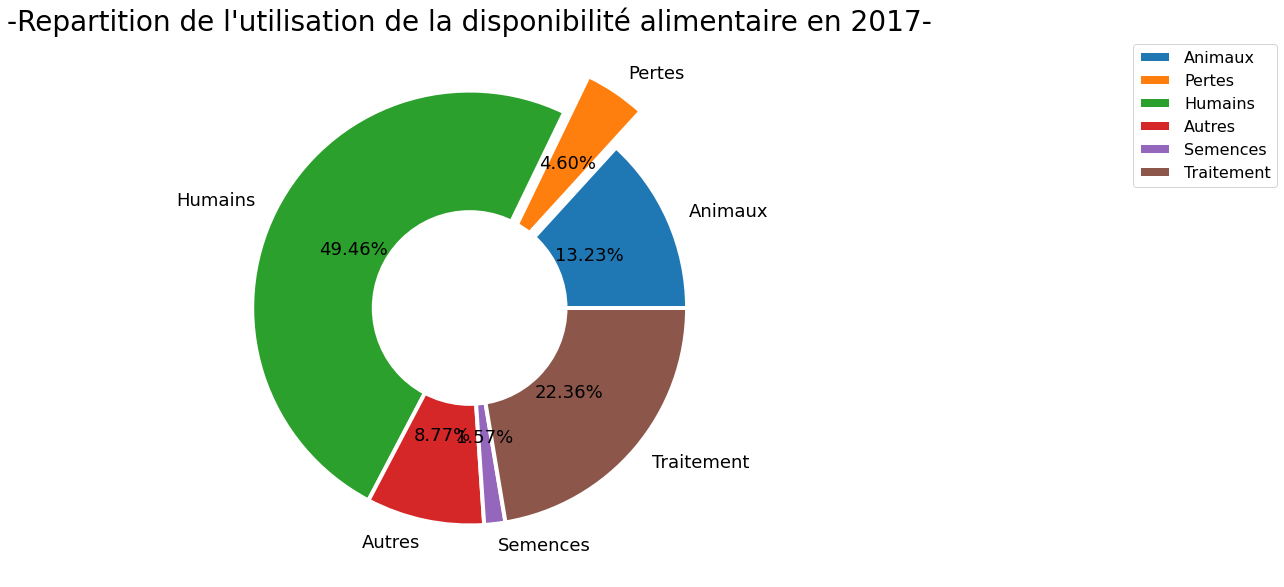

In [118]:
plt.figure(figsize=(20,10))
labels=['Animaux','Pertes','Humains','Autres','Semences','Traitement']
share =[animaux,pertes,humains,autres,semences,traitement]
explode = (0,0.2,0,0,0,0)
plt.pie(x=share,
        labels=labels, 
        autopct='%.2f%%',
        explode=explode,
        wedgeprops={'linewidth':4,'edgecolor':'white'},
        textprops={'fontsize': 18})
circle=plt.Circle(xy=(0,0),radius=.45,facecolor='white')
plt.legend (bbox_to_anchor = (2,1), loc = 'best', prop = {'size': 16})
plt.title("-Repartition de l'utilisation de la disponibilité alimentaire en 2017-",fontsize=28)
plt.gca().add_artist(circle)
plt.show()

In [119]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie3.1">
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">
            3.5 - Utilisations des céréales 
        </h3>
        <br>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
        </div>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

In [120]:
columns1 = ['Zone','Produit','Disponibilité intérieure','Aliments pour animaux','Nourriture','Autres Utilisations','Pertes','Traitement','Semences']
df_c = df_dispo[columns1]
list_cereales=['Blé et produits', 'Céréales, Autres', 'Maïs et produits', 'Millet et produits','Orge et produits', 
'Riz et produits', 'Avoine', 'Sorgho et produits', 'Seigle et produits']
df_cereale = df_c.loc[df_c['Produit'].isin(list_cereales)].dropna(0)
df_cereale=df_cereale.groupby(['Zone']).sum()

# Pour 2013: cereale = 'Blé', 'Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho', 'Seigle'.
# Pour 2017: cereale = 'Blé et produits', 'Céréales, Autres', 'Maïs et produits', 'Millet et produits','Orge et produits', 
# 'Riz et produits', 'Avoine', 'Sorgho et produits', 'Seigle et produits'

In [121]:
df_cereale['Total_par_pays']= df_cereale.sum(axis=1)
df_cereale.loc['Total_par_utilisation',:]= df_cereale.sum(axis=0)
df_cereale['%_Animaux']= round((df_cereale['Aliments pour animaux'])/(df_cereale['Disponibilité intérieure'])*100,2)
df_cereale['%_Nourriture']= round((df_cereale['Nourriture'])/(df_cereale['Disponibilité intérieure'])*100,2)
df_cereale['%_Pertes']= round((df_cereale['Pertes'])/(df_cereale['Disponibilité intérieure'])*100,2)
df_cereale['%_Semences']= round((df_cereale['Semences'])/(df_cereale['Disponibilité intérieure'])*100,2)
df_cereale['%_Autre']= round((df_cereale['Autres Utilisations'])/(df_cereale['Disponibilité intérieure'])*100,2)
df_cereale['%_Traitement']= round((df_cereale['Traitement'])/(df_cereale['Disponibilité intérieure'])*100,2)
cereale_data=df_cereale.iloc[-1,-6:]

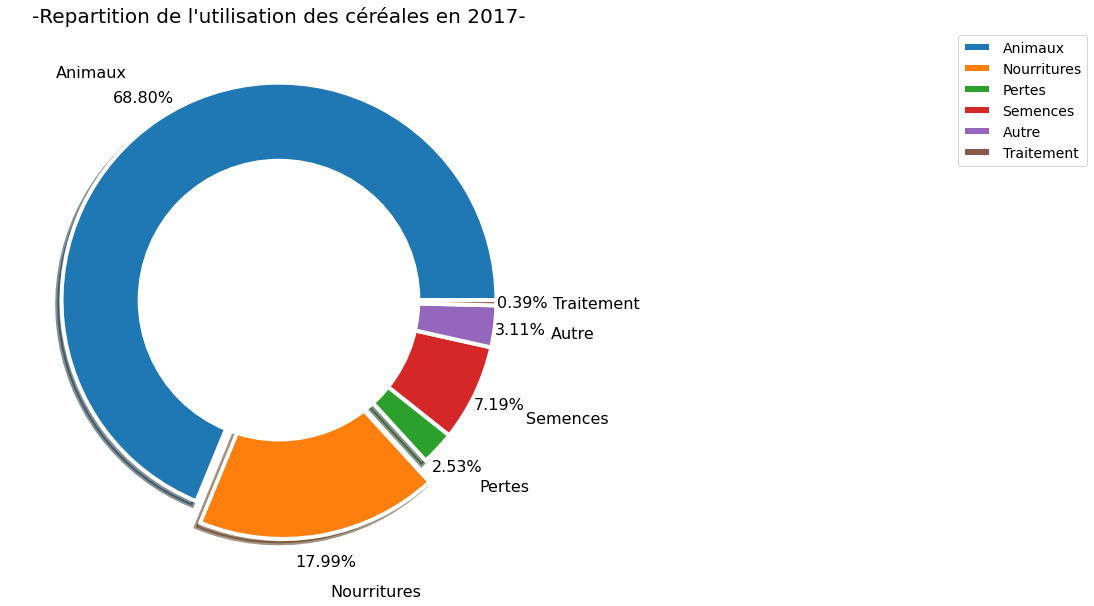

In [122]:
plt.figure(figsize=(20,10))
labels=['Animaux','Nourritures','Pertes','Semences','Autre','Traitement']
explode = (0,0.1,0,0,0,0)
plt.pie(x=cereale_data,
        labels=labels, 
        autopct='%.2f%%',pctdistance=1.12, labeldistance=1.26,
        explode=explode,shadow=True,
        wedgeprops={'linewidth':4,'edgecolor':'white'},
        textprops={'fontsize': 16})
circle=plt.Circle(xy=(0,0),radius=.65,facecolor='white')
plt.legend (bbox_to_anchor = (2, 1), loc = 'best', prop = {'size': 14})
plt.title("-Repartition de l'utilisation des céréales en 2017-",fontsize=20)
plt.gca().add_artist(circle)
plt.show()

<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie3.5">
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">
            Utlisation des céréales
        </h3>
        <br>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
            <lu>
                <li>En utilisant la liste des cereales fournie par le site FAOSTAT, nous constatons une erreur de cohérence entre les données indiquées sur les datas du CSV presentant les utilisations des dispoinibilités... </li>
            </lu>
        </div>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

In [123]:
df_c_v2 = df_dispo[columns1]
list_cereales=['Blé', 'Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho', 'Seigle',
'Blé et produits', 'Céréales, Autres', 'Maïs et produits', 'Millet et produits','Orge et produits', 
'Riz et produits', 'Avoine', 'Sorgho et produits', 'Seigle et produits']
# Pour 2013: cereale = 'Blé', 'Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho', 'Seigle'.
# Pour 2017: cereale = 'Blé et produits', 'Céréales, Autres', 'Maïs et produits', 'Millet et produits','Orge et produits', 
# 'Riz et produits', 'Avoine', 'Sorgho et produits', 'Seigle et produits'

df_cereale_v2 = df_c_v2.loc[df_c_v2['Produit'].isin(list_cereales)].dropna(0)
df_cereale_v2=df_cereale_v2.groupby(['Zone']).sum()

In [124]:
df_cereale_v2['Total_par_pays']= df_cereale_v2.sum(axis=1)
df_cereale_v2.loc['Total_par_utilisation',:]= df_cereale_v2.sum(axis=0)
df_cereale_v2['%_Animaux']= round((df_cereale_v2['Aliments pour animaux'])/(df_cereale_v2['Disponibilité intérieure'])*100,2)
df_cereale_v2['%_Nourriture']= round((df_cereale_v2['Nourriture'])/(df_cereale_v2['Disponibilité intérieure'])*100,2)
df_cereale_v2['%_Pertes']= round((df_cereale_v2['Pertes'])/(df_cereale_v2['Disponibilité intérieure'])*100,2)
df_cereale_v2['%_Semences']= round((df_cereale_v2['Semences'])/(df_cereale_v2['Disponibilité intérieure'])*100,2)
df_cereale_v2['%_Autre']= round((df_cereale_v2['Autres Utilisations'])/(df_cereale_v2['Disponibilité intérieure'])*100,2)
df_cereale_v2['%_Traitement']= round((df_cereale_v2['Traitement'])/(df_cereale_v2['Disponibilité intérieure'])*100,2)
cereale_data_v2=df_cereale_v2.iloc[-1,-6:]

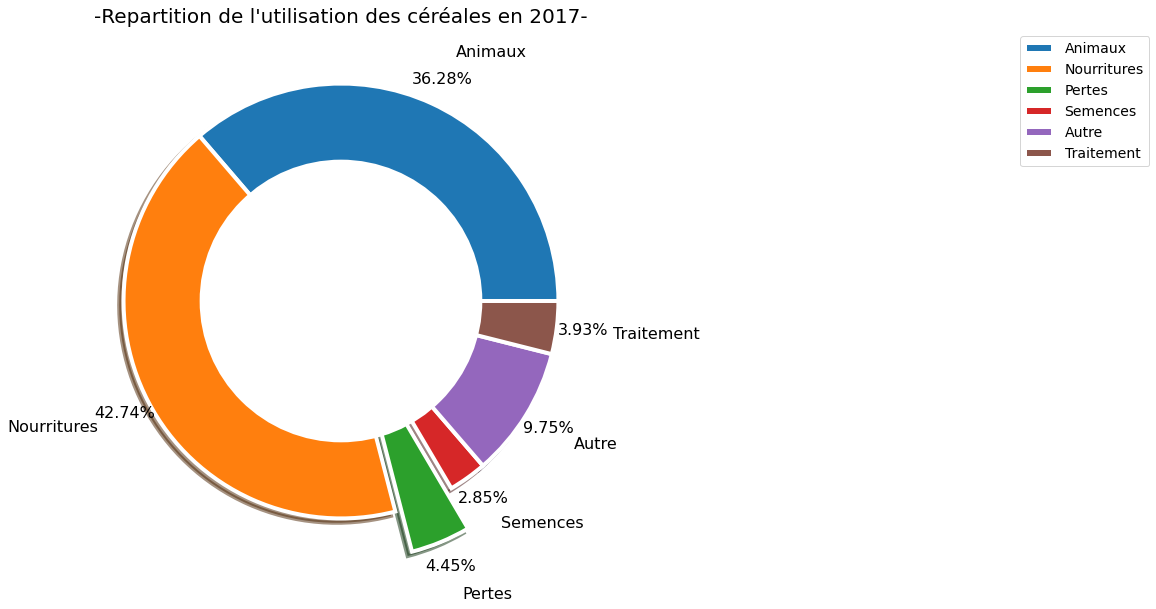

In [125]:
plt.figure(figsize=(20,10))
labels=['Animaux','Nourritures','Pertes','Semences','Autre','Traitement']
explode = (0,0,0.2,0,0,0)
plt.pie(x=cereale_data_v2,
        labels=labels, 
        autopct='%.2f%%',pctdistance=1.12, labeldistance=1.26,
        explode=explode,shadow=True,
        wedgeprops={'linewidth':4,'edgecolor':'white'},
        textprops={'fontsize': 16})
circle=plt.Circle(xy=(0,0),radius=.65,facecolor='white')
plt.legend (bbox_to_anchor = (2, 1), loc = 'best', prop = {'size': 14})
plt.title("-Repartition de l'utilisation des céréales en 2017-",fontsize=20)
plt.gca().add_artist(circle)
plt.show()

In [126]:
# Aliments pour animaux + Semences + traitement + nourritures + pertes + autres utilisations
# = Disponibilité Intérieure =
# Importations + Productions - Variation de stock - Exportations

# Exemple : Pays Afghanistan

# Aliments pour animaux	768
# Semences	395
# Traitement	63
# Nourriture	10682
# Pertes	1135
# Autres Utilisations		415
# Total:13458
    
# Disponibilite interieure		13462

# Total:13460
    
# Exportations - Quantité	278

# Importations - Quantité	2988
# Production	11118
# Variation de stock	-368
# print dispo interieur
# print 1er mode de calcul
# et print 2eme mode de calcul

In [127]:
df_calculs=df_dispo.groupby(['Zone']).sum()
calcul_v1=['Aliments pour animaux','Semences','Traitement','Nourriture','Pertes','Autres Utilisations']
calcul_v2=['Importations - Quantité','Production','Variation de stock']
df_calculs["Dispo_V1"] = df_calculs[calcul_v1].sum(axis=1)
df_calculs["Dispo_V2"] = df_calculs[calcul_v2].sum(axis=1)-df_calculs['Exportations - Quantité']

df_calculs.head(10)

Aliments pour animaux  Autres Utilisations  \
Zone                                                             
Afghanistan                  7.680000e+08         4.150000e+08   
Afrique du Sud               5.309000e+09         8.760000e+08   
Albanie                      6.600000e+08         1.740000e+08   
Algérie                      4.352000e+09         1.707000e+09   
Allemagne                    3.020900e+10         7.711000e+09   
Angola                       9.259000e+09         4.510000e+08   
Antigua-et-Barbuda           0.000000e+00         2.000000e+07   
Arabie saoudite              1.184100e+10         1.590000e+08   
Argentine                    7.890000e+09         4.194000e+09   
Arménie                      6.570000e+08         2.420000e+08   

                    Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                 
Afghanistan                                                 2087.0   
Afrique du Sud                                              3020.0   
Albanie                                                     3188.0   
Algérie                                                     3293.0   
Allemagne                                                   3503.0   
Angola                                                      2474.0   
Antigua-et-Barbuda                                          2416.0   
Arabie saoudite                                             3255.0   
Argentine                                                   3226.0   
Arménie                                                     2924.0   

                    Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                         
Afghanistan                                                    351.41        
Afrique du Sud                                                 564.80        
Albanie                                                       1095.54        
Algérie                                                        809.13        
Allemagne                                                      957.52        
Angola                                                         701.46        
Antigua-et-Barbuda                                             694.17        
Arabie saoudite                                                622.78        
Argentine                                                      784.96        
Arménie                                                        985.68        

                    Disponibilité de matière grasse en quantité (g/personne/jour)  \
Zone                                                                                
Afghanistan                                                     33.50               
Afrique du Sud                                                  83.58               
Albanie                                                        106.48               
Algérie                                                         76.48               
Allemagne                                                      141.62               
Angola                                                          53.54               
Antigua-et-Barbuda                                              89.76               
Arabie saoudite                                                107.83               
Argentine                                                      116.46               
Arménie                                                         96.63               

                    Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                           
Afghanistan                                                     58.26          
Afrique du Sud                                                  85.33          
Albanie                                                        111.37          
Algérie                     

<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie3.6">
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">
            3.6 - Focus sur l'utilisation du Manioc en Thaïlande
        </h3>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
        </div>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

In [128]:
manioc=['Manioc']
df_manioc= df_dispo.loc[df_dispo['Produit'].isin(manioc)].dropna(0)
df_manioc_thailande =df_manioc.loc[df_manioc['Zone']=='Thaïlande']
proportion_manioc = round(df_manioc_thailande['Exportations - Quantité']/df_manioc_thailande['Production']*100,2)
proportion_manioc
df_manioc_thailande.head()

Zone Produit   Origine  Aliments pour animaux  \
13809  Thaïlande  Manioc  vegetale           1.800000e+09   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
13809         2.081000e+09                                            40.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
13809                                               13.0        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
13809                                               0.05               

       Disponibilité de protéines en quantité (g/personne/jour)  \
13809                                               0.14          

       Disponibilité intérieure  Exportations - Quantité  \
13809              6.264000e+09             2.521400e+10   

       Importations - Quantité   Nourriture        Pertes    Production  \
13809             1.250000e+09  871000000.0  1.511000e+09  3.022800e+10   

       Semences  Traitement  Variation de stock  
13809       0.0         0.0                 0.0

In [129]:
proportion_manioc = round(df_manioc_thailande['Exportations - Quantité']/df_manioc_thailande['Production']*100,2)
proportion_manioc

13809    83.41
dtype: float64

In [130]:
taux_sn_thailande = dffinal[dffinal ['Zone']=="Thaïlande"]
taux_sn_thailande['Ratio_SN']=taux_sn_thailande['Ratio_SN']*100
taux_sn_thailande

Zone         SN  Année  Population  Ratio_SN
1110  Thaïlande  6200000.0   2013  68144518.0      9.10
1111  Thaïlande  6000000.0   2014  68438746.0      8.77
1112  Thaïlande  5900000.0   2015  68714511.0      8.59
1113  Thaïlande  6000000.0   2016  68971308.0      8.70
1114  Thaïlande  6200000.0   2017  69209810.0      8.96
1115  Thaïlande  6500000.0   2018  69428453.0      9.36

<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie3.6">
        <h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">
            Utlisation du Manioc en Thaïlande
        </h3>
        <br>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
            <lu>
                <li>84% de la production du Manioc est exportée par la Thaïlande . Le taux de sous-nutrition est de 8.96% pour 2017. </li>
            </lu>
        </div>
        <br>
        <font size="-0"><a href="#partie3.6"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

<div>
    <div style="background-color: RGB(51,165,182);" id="partie4">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 4 - La mission : réponses aux questions de Mélanie
        </h2>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

In [131]:
haute_prop = (df_2017.sort_values('Ratio_SN', ascending=False).reset_index(drop=True))
z=haute_prop.head(10)

<div>
    <div style="border: 1px solid RGB(51,165,182);"id="partie4.1" >
        <h3 style="margin: 10px; padding: 20px; color: RGB(51,165,182); ">
            1 - Pays avec la proportion de personnes sous-alimentés la plus forte en 2017
        </h3>
        <br>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
                <ol>Les 10 pays avec la proportion en 2017 la plus élévées sont :<br>
                  <li>Haïti</li>
                  <li>Corée du Nord</li>
                  <li>Madagascar</li>
                  <li>Lesotho</li>
                  <li>Libéria</li>
                  <li>Tchad</li>
                  <li>Rwanda</li>
                  <li>Mozambique</li>
                  <li>Timor-Leste</li>
                  <li>Afghanistan</li>
                </ol>    
        </div>
        <br>
<font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

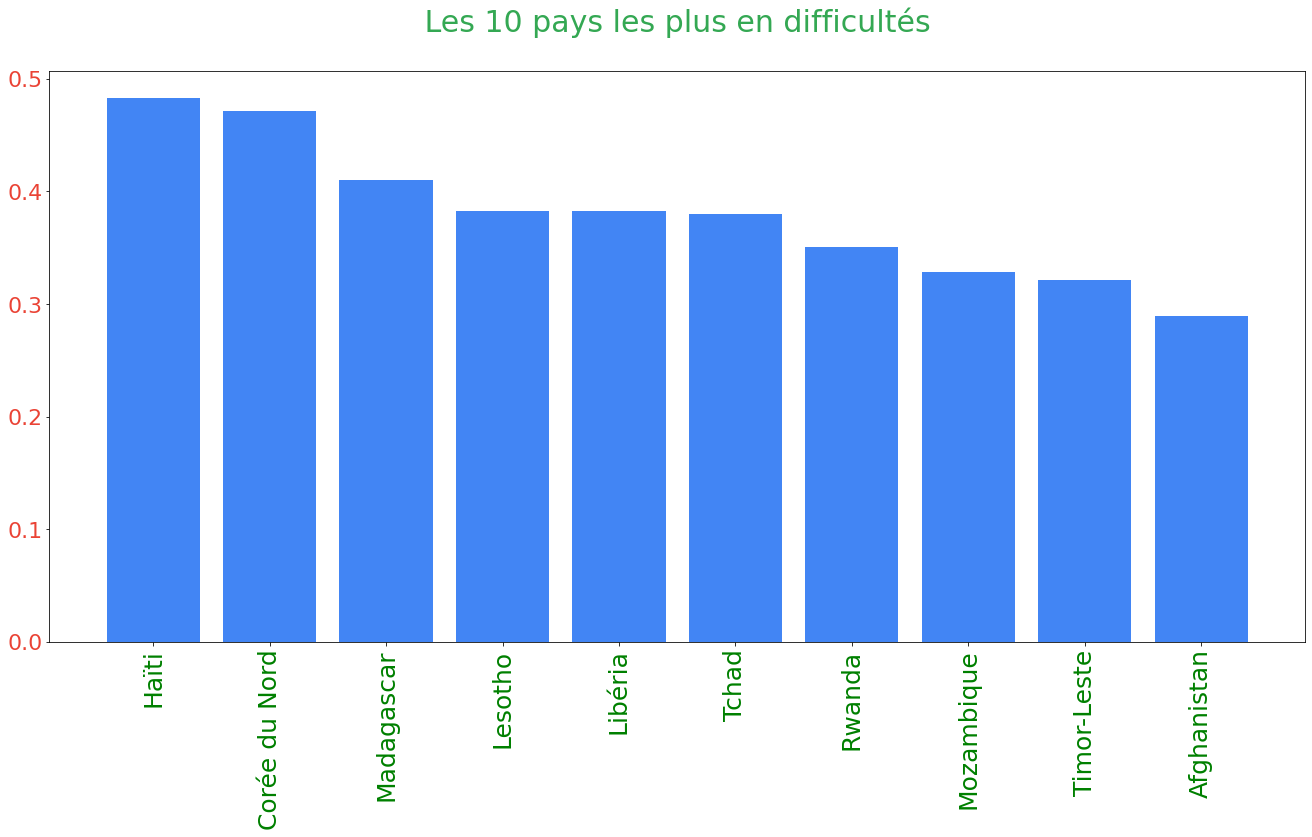

In [132]:
y=z['Ratio_SN']
x=z['Zone']  
plt.bar(x, y, color='#4285F4') 
plt.xticks(rotation='vertical',size=25,color='green')
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['Haïti','Corée du Nord','Madagascar','Lesotho','Libéria','Tchad','Rwanda','Mozambique','Timor-Leste','Afghanistan'])
plt.yticks(size=22,color='#EA4335')
plt.rcParams["figure.figsize"] = (22.5, 10.5)
# plt.ylabel("S_N",size=26,rotation='horizontal',loc='top',color='#F65314')    
plt.title(" Les 10 pays les plus en difficultés ",size=30,pad=40,color='#34A853') 

plt.show()

In [133]:
df_aide2013=df_aide.groupby(['Pays bénéficiaire']).sum().drop(columns="Année").sort_values(by=['Aide_Kg'], ascending=False)
df_aide2013.head(10)

Aide_Kg
Pays bénéficiaire                           
République arabe syrienne         1858943000
Éthiopie                          1381294000
Yémen                             1206484000
Soudan du Sud                      695248000
Soudan                             669784000
Kenya                              552836000
Bangladesh                         348188000
Somalie                            292678000
République démocratique du Congo   288502000
Niger                              276344000

<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie4.2">
        <h3 style="margin: 10px; padding: 20px; color: RGB(51,165,182); ">
            4.2 - Pays ayant reçu le plus d'aide depuis 2013
        </h3>
        <br>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
                <ol>Les 10 pays ayant bénéficié le plus d'aide en 2013 sont :
                  <li>Syrie</li>
                  <li>Ethiopie</li>
                  <li>Yémen</li>
                  <li>Soudan du Sud</li>
                  <li>Soudan</li>
                  <li>Kenya</li>
                  <li>Bangladesh</li>
                  <li>Somalie</li>
                  <li>Congo</li>
                  <li>Niger</li>
                </ol>    
        </div>
        <br>
<font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

In [134]:
columns = ['Zone','Disponibilité alimentaire (Kcal/personne/jour)']
dfdispoalim = df_dispo[columns]
dfdispoalim=dfdispoalim.groupby(['Zone']).sum().sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
dfdispoalim


Disponibilité alimentaire (Kcal/personne/jour)
Zone                                                                     
Autriche                                                           3770.0
Belgique                                                           3737.0
Turquie                                                            3708.0
États-Unis d'Amérique                                              3682.0
Israël                                                             3610.0
...                                                                   ...
Haïti                                                              2089.0
Afghanistan                                                        2087.0
Madagascar                                                         2056.0
Zambie                                                             1924.0
République centrafricaine                                          1879.0

[174 rows x 1 columns]

<div>
    <div style="border: 1px solid RGB(51,165,182);" id="partie4.3">
        <h3 style="margin: 10px; padding: 20px; color: RGB(51,165,182); ">
            4.3 - Disponibilités par habitant
        </h3>
        <br>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;">
                <ol>Les  pays ayant le plus et le moins de disponibilité par habitant sont :
                  <li>Autriche</li>
                  <li>Belgique</li>
                  <li>Turquie</li>
                  <li>Etats Unis d'Amerique</li>
                  <li>Israël</li>
                  <ul>...</ul>
                  <ul>...</ul>
                  <li>Haïti</li>
                  <li>Afghanistan</li>
                  <li>Madagascar</li>
                  <li>Zambie</li>
                  <li>République Centrafricaine</li>
                </ol>    
        </div>
        <br>
<font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

<div>
    <div style="background-color: RGB(51,165,182);" id="partie5">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 5 - Visualisation des disponibilités par habitants niveau mondiale
        </h2>
        <br>
        <font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>    </div>
</div>

In [135]:
df_gps = pd.read_csv('/home/david/OC/gps_pays_v2.csv')
df_gps=df_gps.drop(columns="Unnamed: 0")
df_gps=df_gps.drop(columns="Unnamed: 1")
df_gps

latitude   longitude                                    Zone
0      33.93911   67.709953                             Afghanistan
1    -30.559482   22.937506                          Afrique du Sud
2     41.153332   20.168331                                 Albanie
3     28.033886    1.659626                                 Algérie
4     51.165691   10.451526                               Allemagne
..          ...         ...                                     ...
251     6.42375   -66.58973  Venezuela (République bolivarienne du)
252   14.058324  108.277199                                Viet Nam
253   15.552727   48.516388                                   Yémen
254  -13.133897   27.849332                                  Zambie
255  -19.015438   29.154857                                Zimbabwe

[256 rows x 3 columns]

In [136]:
df_dispo_gps = pd.merge(dfdispoalim, df_gps, on=['Zone'],how='left')
df_dispo_gps.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)
df_dispo_gps[['latitude', 'longitude']]=df_dispo_gps[['latitude', 'longitude']].astype(float)
df_dispo_gps

Zone  \
0                     Autriche   
1                     Belgique   
2                      Turquie   
3        États-Unis d'Amérique   
4                       Israël   
..                         ...   
169                      Haïti   
170                Afghanistan   
171                 Madagascar   
172                     Zambie   
173  République centrafricaine   

     Disponibilité alimentaire (Kcal/personne/jour)   latitude  longitude  
0                                            3770.0  47.516231  14.550072  
1                                            3737.0  50.503887   4.469936  
2                                            3708.0  38.963745  35.243322  
3                                            3682.0  37.090240 -95.712891  
4                                            3610.0  31.046051  34.851612  
..                                              ...        ...        ...  
169                                          2089.0  18.971187 -72.285215  
170                                          2087.0  33.939110  67.709953  
171                                          2056.0 -18.766947  46.869107  
172                                          1924.0 -13.133897  27.849332  
173                                          1879.0   6.611111  20.939444  

[174 rows x 4 columns]

In [137]:
geometry = geopandas.points_from_xy(df_dispo_gps.longitude, df_dispo_gps.latitude)
geo_df = geopandas.GeoDataFrame(df_dispo_gps[['Zone','Disponibilité alimentaire (Kcal/personne/jour)', 'latitude', 'longitude']], geometry=geometry)

geo_df.head()

Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0               Autriche                                          3770.0   
1               Belgique                                          3737.0   
2                Turquie                                          3708.0   
3  États-Unis d'Amérique                                          3682.0   
4                 Israël                                          3610.0   

    latitude  longitude                    geometry  
0  47.516231  14.550072   POINT (14.55007 47.51623)  
1  50.503887   4.469936    POINT (4.46994 50.50389)  
2  38.963745  35.243322   POINT (35.24332 38.96375)  
3  37.090240 -95.712891  POINT (-95.71289 37.09024)  
4  31.046051  34.851612   POINT (34.85161 31.04605)

In [138]:
map = folium.Map(zoom_start=10, control_scale=True)
# f = folium.Figure(width=4000, height=1000)
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

i = 0
for coordinates in geo_df_list:
    if geo_df['Disponibilité alimentaire (Kcal/personne/jour)'][i] > 2500:
        type_color = "green"
    elif (geo_df['Disponibilité alimentaire (Kcal/personne/jour)'][i] < 2500) & (geo_df['Disponibilité alimentaire (Kcal/personne/jour)'][i] > 2100):
        type_color = "orange"
    elif geo_df['Disponibilité alimentaire (Kcal/personne/jour)'][i] < 2099 :
        type_color = "red"


    map.add_child(folium.Marker(location = coordinates,
                            popup =
                            str(geo_df.Zone[i])+ '<br>' +
                            "Dispo par habitants: " + str(geo_df['Disponibilité alimentaire (Kcal/personne/jour)'][i])+ ' Kcal/jour'+'<br>',
                            icon = folium.Icon(color = "%s" % type_color)))
    i = i + 1
map

<a id = "conclusion"></a>
# Conclusion
<br />
<font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>

<a id = "Références"></a>
# Références
- [Openclassrooms : Initiez-vous à Python pour l'analyse de données](https://openclassrooms.com/fr/courses/6204541-initiez-vous-a-python-pour-lanalyse-de-donnees)
- [Openclassrooms : Nettoyez et analysez votre jeu de données](https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees)
- [Openclassrooms : Découvrez les librairies Python pour la Data Science](https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science)
- [Programmer en Python pour la Data Science de A à Z(accés payant)](https://www.udemy.com/share/1021Is3@EzcQ1YRihkJt4KVzbd8E_XRJntE0UWkY43R4qjuXO2W4AaRJIK5P4TNtDKQ1p8PZGQ==/)
- [Machine Learnia : Formation Python Machine Learning](https://youtu.be/82KLS2C_gNQ)
<br />        
<font size="-0"><a href="#partie0"> <img src="https://img.icons8.com/windows/32/000000/circled-up.png"/ align=left> </a></font>